In [2]:
import pandas as pd
import random
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 
from sklearn import preprocessing
%matplotlib inline

In [3]:
rain = pd.read_excel('./AvgAnnualPrecipitation.xlsx')

In [4]:
m = [None]*len(rain)
rain['Mag'] = m

In [5]:
rain.head()

,Days,Place,Region,Inches,Millimeters,Latitude,Longitude,Mag
0,75,Bologna,NE,26.4,671,44.4949,11.3426,None
1,76,Bolzano,NE,28.0,712,46.4983,11.3548,None
2,75,Cervia,NE,25.9,658,44.2635,12.3477,None
3,87,Monte Cimone,NE,24.2,615,44.1938,10.7015,None
4,88,Paganella,NE,30.1,764,46.1333,11.0333,None


In [6]:
for i in range(len(rain)):
    
    if (rain['Millimeters'][i] >= 300 and rain['Millimeters'][i] <= 500):
        rain['Mag'][i] = 3
        
    if (rain['Millimeters'][i] > 500 and rain['Millimeters'][i] <= 900):
        rain['Mag'][i] = 2
        
    if (rain['Millimeters'][i] > 900 and rain['Millimeters'][i] <= 1417):
        rain['Mag'][i] = 1

C:\Users\dasa\AppData\Local\Temp/ipykernel_9172/3648424788.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rain['Mag'][i] = 2
C:\Users\dasa\AppData\Local\Temp/ipykernel_9172/3648424788.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rain['Mag'][i] = 1
C:\Users\dasa\AppData\Local\Temp/ipykernel_9172/3648424788.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rain['Mag'][i] = 3


In [7]:
rain.head()

,Days,Place,Region,Inches,Millimeters,Latitude,Longitude,Mag
0,75,Bologna,NE,26.4,671,44.4949,11.3426,2
1,76,Bolzano,NE,28.0,712,46.4983,11.3548,2
2,75,Cervia,NE,25.9,658,44.2635,12.3477,2
3,87,Monte Cimone,NE,24.2,615,44.1938,10.7015,2
4,88,Paganella,NE,30.1,764,46.1333,11.0333,2


In [31]:
rain['Mag'].value_counts()

2    30
1     9
3     5
Name: Mag, dtype: int64

In [23]:
X = rain[['Latitude', 'Longitude']]
Y = rain[['Mag']]
Y=Y.astype('int')

In [24]:
X.head()

,Latitude,Longitude
0,44.4949,11.3426
1,46.4983,11.3548
2,44.2635,12.3477
3,44.1938,10.7015
4,46.1333,11.0333


In [25]:
Y.head()

,Mag
0,2
1,2
2,2
3,2
4,2


In [26]:
# Normalizing data
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.67949931, -0.48389286],
       [ 1.41924792, -0.47885863],
       [ 0.59405565, -0.06914658],
       [ 0.56831917, -0.74843752],
       [ 1.28447292, -0.61152297]])

In [53]:

# Importing library 
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics

# Split in train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (30, 2) (30, 1)
Test set: (14, 2) (14, 1)


mean_acc: [0.64285714 0.92857143 0.64285714 0.64285714 0.64285714 0.64285714
 0.64285714 0.64285714 0.64285714 0.64285714 0.64285714 0.64285714
 0.64285714 0.64285714]


C:\Users\dasa\Software\Python\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\dasa\Software\Python\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\dasa\Software\Python\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\dasa\Software\Python\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

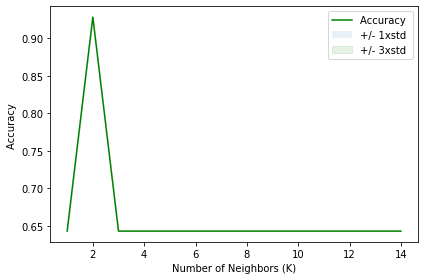

The best accuracy was with 0.9285714285714286 with k= 2


In [54]:
# Finding best k
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    #std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

print("mean_acc:", mean_acc)

# Plotting model accuracy for different K-values
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

# Printing K value with best accuracy
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

In [55]:
# Using k=2 to build KNN model
k = 2
# Train Model and Predict
neighk = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhatk = neighk.predict(X_test)

# Accuracy Evaluation
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neighk.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhatk))

print(yhatk [0:25])
print(y_test [0:25])

Train set Accuracy:  0.8
Test set Accuracy:  0.9285714285714286
[2 2 2 1 2 2 1 1 2 1 2 2 2 2]
    Mag
31    2
43    2
4     2
15    1
28    2
19    2
16    1
7     1
18    2
11    1
27    2
35    2
12    1
22    2


C:\Users\dasa\Software\Python\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [68]:
#taking input co-ordinates as 41.8368, 12.6528

lat = 44.6467
long = 7.6639

IC = [lat, long]


r = neighk.predict(preprocessing.StandardScaler().fit([ IC ]).transform([ IC ]))
R = str(r[0])
R

'2'

In [69]:
with open("./Rainfall.txt", "w") as text_file:
    text_file.write(R)